In [1]:
from Composite.CreateSimulation.CreateSimulation import CreateSimulation

Wine está instalado. Versión: wine-9.0
Wine is installed. Calculix will be run with windows binary


In [2]:
# import numpy as np

# def remove_by_type(self,dim):
#     id_elements = [j for j, card in enumerate(self.cards) 
#                         if card.type         == '*ELEMENT' 
#                         if card.options["TYPE"] == types[dim-1]]

#     idx = np.arange(len(self.cards))
#     idx = np.delete(idx,id_elements)

#     cards_select = self.cards[idx]

#     self.cards = cards_select

#     return self

In [3]:
inpf = CreateSimulation("output/mesh")

In [4]:
import pandas as pd
from Composite.inp.are_coplanar import are_coplanar

In [5]:

def element2points(element):
    df_nodes = element.GetNodes(inpf.nodes)
    df_nodes = pd.concat(df_nodes)
    # remove duplicate nodes
    df_nodes = df_nodes.drop_duplicates()
    return df_nodes
def element_plane(element):

    df_nodes = element2points(element)

    points = df_nodes[["x","y","z"]].values
    points = [list(point) for point in points]

    return are_coplanar(points)


elements = [ element 
            for element in inpf.elements 
            if element.dimension == 2 and element_plane(element)]

# remove elements
for element in elements:
    element.name = "DELETE"

inpf.cards = [card for card in inpf.cards if card.name != "DELETE"]

In [6]:
len(elements)

88

In [7]:
len(inpf.elements )

511

In [8]:

elements = [ element 
            for element in inpf.elements 
            if element.dimension == 2 ] 

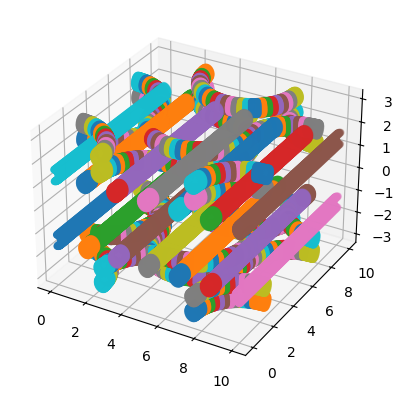

In [9]:
from matplotlib import pyplot as plt

fig = plt.figure()
# plot x,y,z
ax = fig.add_subplot(111, projection='3d')
for element in elements:
    df_nodes = element2points(element)
    ax.scatter(df_nodes["x"], df_nodes["y"], df_nodes["z"])

In [10]:

for element in elements:
    element.options["TYPE"]= "S6"

In [11]:
output_folder = "output/ccx"

inpf.run(output_folder)


Running Calculix at:  output/ccx
Output file:  /home/djoroya/Documents/CITISENS_Composite/scripts/AITEX/output/ccx/out.txt
Command:
 wine /home/djoroya/Documents/CITISENS_Composite/.conda/lib/python3.13/site-packages/djccx/bin/ccx_dynamic.exe main > out.txt
Error reading cvf file

pid:  37201 

Calculix finished



ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (486304,) + inhomogeneous part.